<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ThermodynamicandphysicalpropertiesofCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Thermodynamic and physical properties of CO2
#@markdown Carbon dioxide (chemical formula CO2) is a colorless gas with a density about 60% higher than that of dry air. Carbon dioxide consists of a carbon atom covalently double bonded to two oxygen atoms. It occurs naturally in Earth's atmosphere as a trace gas. 
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

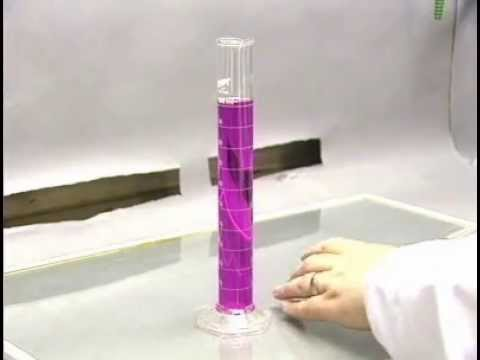

In [7]:
#@title  The Properties Of Carbon Dioxide
from IPython.display import YouTubeVideo
YouTubeVideo('AOfnXKzGO9I', width=600, height=400)

In [11]:
#@title  Calculation of density, speeed of sound, Cp, Cv of CO2
#@markdown Evaluation of different EOS for calculation of thermodynamic properties of CO2 

from neqsim.thermo import fluid, TPflash

temperature = 25.0
pressure = 30.0

#thermodynamicModels srk, pr, cpa, gerg

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0)
fluidCO2.setPressure(pressure, "bara")
fluidCO2.setTemperature(temperature, "C")
TPflash(fluidCO2)

densityCO2 = fluidCO2.getDensity("kg/m3")

print("CO2 density", densityCO2, " kg/m3")

CO2 density 64.20221175352525  kg/m3


In [13]:
#@title  Calculation of physical properties of CO2
#@markdown Evaluation of different models for calculation of thermodynamic properties of CO2 

from neqsim.thermo import fluid, TPflash

#viscosity models friction theory, LBC, PFCT, polynom

temperature = 25.0
pressure = 30.0

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0)
fluidCO2.setPressure(pressure, "bara")
fluidCO2.setTemperature(temperature, "C")
TPflash(fluidCO2)

method = "PFCT"
fluidCO2.getPhase('gas').getPhysicalProperties().setViscosityModel(method)

viscosityCO2 = fluidCO2.getViscosity("cP")

print("CO2 viscosity", viscosityCO2, " CP")

CO2 viscosity 0.01656877112657292  CP
